In [218]:
import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

import scipy

# (1). [50] Prepare a data quality report for the CSV file.

In [219]:

# for now, df is created from original dataset
# should be replaced by cleaned version once quality plan is complete
df = pd.read_csv('OnlineNewsPopularity.csv', skipinitialspace=True)
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#df = df.drop(['url', 'timedelta'], axis=1)
# drop non-predictive features

In [220]:
#Print (rows, columns)
df.head(3)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500


In [221]:
df1 = df.drop('shares', axis=1)
df2=df1.drop('url', axis=1)

In [222]:

df3=scipy.sparse.csr_matrix(df2.values)

In [223]:
y=df.as_matrix(columns=['shares'])

In [224]:
col=list(df2.columns.values)

In [225]:
res = dict(zip(col,
               sklearn.feature_selection.mutual_info_classif(df3, y, discrete_features=True)
               ))

NameError: name 'sklearn' is not defined

{'LDA_00': 5.3683915362330374,
 'LDA_01': 5.3523199569360722,
 'LDA_02': 5.3781644224537075,
 'LDA_03': 5.3462810765221249,
 'LDA_04': 5.3710643647200067,
 'abs_title_sentiment_polarity': 0.50702816220588831,
 'abs_title_subjectivity': 0.43979556291202926,
 'average_token_length': 4.862218222274274,
 'avg_negative_polarity': 3.2184776499478405,
 'avg_positive_polarity': 4.550486467232763,
 'data_channel_is_bus': 0.019734703530144952,
 'data_channel_is_entertainment': 0.028221257938357381,
 'data_channel_is_lifestyle': 0.016517076680820295,
 'data_channel_is_socmed': 0.021559352173343017,
 'data_channel_is_tech': 0.025760582972089992,
 'data_channel_is_world': 0.033772286388906787,
 'global_rate_negative_words': 3.2334070871857832,
 'global_rate_positive_words': 3.6223875279391913,
 'global_sentiment_polarity': 5.0554207505644913,
 'global_subjectivity': 5.0455606551707159,
 'is_weekend': 0.033357583699486673,
 'kw_avg_avg': 5.3674749949656313,
 'kw_avg_max': 5.0014755022737392,
 'kw_avg_min': 4.1477465186447944,
 'kw_max_avg': 4.2258022861775739,
 'kw_max_max': 0.099661120751210974,
 'kw_max_min': 1.6862121516285513,
 'kw_min_avg': 2.7190278778614578,
 'kw_min_max': 0.99983234514130503,
 'kw_min_min': 0.053593571044521754,
 'max_negative_polarity': 0.25845928194887174,
 'max_positive_polarity': 0.17879915239025657,
 'min_negative_polarity': 0.28497092261873314,
 'min_positive_polarity': 0.18594115670637662,
 'n_non_stop_unique_tokens': 4.5355325459776816,
 'n_non_stop_words': 1.8600226943587341,
 'n_tokens_content': 2.2139975492463311,
 'n_tokens_title': 0.16149333202589627,
 'n_unique_tokens': 4.7738715496223669,
 'num_hrefs': 0.42329342722289792,
 'num_imgs': 0.28439453282237359,
 'num_keywords': 0.12456877659897686,
 'num_self_hrefs': 0.19677041286643404,
 'num_videos': 0.14253212459190581,
 'rate_negative_words': 1.5064827587538716,
 'rate_positive_words': 1.5158634846150842,
 'self_reference_avg_sharess': 2.2845925840343497,
 'self_reference_max_shares': 1.2087976581423132,
 'self_reference_min_shares': 1.3049492964946465,
 'timedelta': 1.7723839453974395,
 'title_sentiment_polarity': 0.6089786677705652,
 'title_subjectivity': 0.5472633834302385,
 'weekday_is_friday': 0.018957945216486138,
 'weekday_is_monday': 0.019821589042664917,
 'weekday_is_saturday': 0.022387405911094269,
 'weekday_is_sunday': 0.020253328014658761,
 'weekday_is_thursday': 0.01962792154740356,
 'weekday_is_tuesday': 0.020586316422148067,
 'weekday_is_wednesday': 0.020629877393717369}

### - Check how many rows and columns your CSV has.

We have a 39644 articles in our dataframe, with 33 features associated with each individual article.

### - Print the first and the last 5 rows.

In [226]:
df.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [227]:
df.tail(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.5,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,7.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,616.0,184.000,6500.0,843300.0,192985.714286,1664.267857,5470.168651,3411.660830,2100.0,2100.0,2100.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.029349,0.028575,0.231866,0.681635,0.028575,0.564374,0.194249,0.039634,0.009146,0.812500,0.187500,0.374825,0.136364,0.70,-0.211111,-0.4,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,8.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,691.0,168.250,6200.0,843300.0,295850.000000,1753.882353,6880.687034,4206.439195,1400.0,1400.0,1400.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.159004,0.025025,0.025207,0.643794,0.146970,0.510296,0.024609,0.033937,0.024887,0.576923,0.423077,0.307273,0.136364,0.50,-0.356439,-0.8,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,5.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,-1.000,0.0,843300.0,254600.000000,0.000000,3384.316871,1777.895883,452.0,452.0,452.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.040004,0.040003,0.839987,0.040002,0.040004,0.358578,-0.008066,0.020528,0.023460,0.466667,0.533333,0.236851,0.062500,0.50,-0.205246,-0.5,-0.012500,0.000000,0.000000,0.500000,0.000000,1100
39643,http://mashable.com/2014/12/27/youtube-channel...,8.0,10.0,157.0,0.701987,1.0,0.846154,1.0,1.0,0.0,2.0,4.471338,4.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,97.0,23.500,205600.0,843300.0,366200.000000,3035.080555,3613.512953,3296.909481,2100.0,2100.0,2100.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.050001,0.799339,0.050000,0.050659,0.050001,0.517893,0.104892,0.063694,0.012739,0.833333,0.166667,0.247338,0.100000,0.50,-0.200000,-0.2,-0.200000,0.333333,0.250000,0.166667,0.250000,1300


### - Convert the features to their appropriate data types (e.g., decide which features are more appropriate as continuous and which ones as categorical types). 

In [228]:
df.dtypes

url                               object
timedelta                        float64
n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max      

We have concluded that it might be more efficient to convert the features relating to data channel type (eg data_channel_is_lifestyle) and days of the week (eg, weekday_is_monday) on which an article was published into categorical features.
This would mean a single categorical feature 'weekday', with seven levels (ie monday through to sunday).
And another categorical feature 'data_channel', which would have six levels (lifestyle, entertainment, socmed, bus, tech, world)

In [229]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [230]:
df.dtypes

url                               object
timedelta                        float64
n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max      

In [231]:
# check for duplicate rows
print('Duplicate rows:', df.duplicated()[df.duplicated() == True].shape[0])

Duplicate rows: 0


In [232]:
# Check for duplicate columns
print('Duplicate columns:',df.columns.size - df.columns.unique().size)

Duplicate columns: 0


In [233]:
df.shape

(39644, 61)

In [234]:
df_shuffle=shuffle(df)

In [235]:
df_train=df_shuffle.head(27751)

In [236]:
df_test=df_shuffle.head(11893)

In [237]:
df_train.head(10)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
31150,http://mashable.com/2014/08/20/george-w-bush-i...,141.0,12.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.000000,8.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,604.0,184.073750,7000.0,843300.0,380112.500000,3049.333333,7131.199748,4647.621385,0.0,0.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025001,0.351635,0.025000,0.573362,0.025002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.50,0.0,2400
34014,http://mashable.com/2014/10/03/unemployment-ra...,95.0,10.0,547.0,0.559772,1.0,0.716049,12.0,1.0,1.0,0.0,4.411335,4.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.000000,0.0,843300.0,321750.000000,0.000000,3752.780892,2579.421922,2900.0,2900.0,2900.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.050005,0.051605,0.050004,0.798383,0.050002,0.479048,0.197857,0.031079,0.012797,0.708333,0.291667,0.542647,0.100000,1.0,-0.221429,-0.500000,-0.050000,0.40,-0.2,0.10,0.2,1700
6360,http://mashable.com/2013/05/04/kentucky-derby-...,614.0,7.0,354.0,0.603989,1.0,0.799020,8.0,4.0,1.0,0.0,4.598870,3.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,294.0,197.333333,40400.0,690400.0,274866.666667,2269.734973,3399.393758,2899.342334,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.066673,0.731570,0.066958,0.068132,0.066667,0.362952,0.145121,0.031073,0.011299,0.733333,0.266667,0.386639,0.033333,1.0,-0.156250,-0.200000,-0.100000,0.00,0.0,0.50,0.0,1300
33015,http://mashable.com/2014/09/18/founder-busines...,112.0,12.0,223.0,0.688372,1.0,0.763158,5.0,2.0,2.0,0.0,4.914798,9.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,692.0,118.375000,0.0,843300.0,373077.777778,0.000000,14647.238095,4643.672926,1300.0,1300.0,1300.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.245629,0.022918,0.257883,0.451346,0.022223,0.360648,0.139815,0.044843,0.013453,0.769231,0.230769,0.298333,0.100000,0.8,-0.197222,-0.300000,-0.125000,0.60,0.3,0.10,0.3,1100
14597,http://mashable.com/2013/10/15/playstation-4s-...,450.0,10.0,883.0,0.396355,1.0,0.595556,6.0,4.0,1.0,0.0,4.184598,4.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,233.0,85.750000,7400.0,843300.0,277625.000000,1515.575758,3271.379184,2439.305780,522.0,522.0,522.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050005,0.513948,0.334997,0.051050,0.050000,0.491136,0.195009,0.062288,0.011325,0.846154,0.153846,0.347424,0.033333,0.8,-0.265595,-0.500000,-0.100000,0.00,0.0,0.50,0.0,640
24049,http://mashable.com/2014/04/23/sisterhood-of-t...,260.0,11.0,905.0,0.399554,1.0,0.554702,1.0,1.0,12.0,1.0,4.785635,6.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,1100.0,236.400000,0.0,843300.0,212200.000000,0.000000,3602.624555,2330.213727,583.0,583.0,583.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.033334,0.033334,0.866665,0.033334,0.033334,0.419115,0.148842,0.044199,0.009945,0.816327,0.183673,0.372471,0.136364,0.8,-0.328704,-0.800000,-0.125000,0.00,0.0,0.50,0.0,1300
12234,http://mashable.com/2013/08/28/twitter-trendrr/,498.0,9.0,180.0,0.597765,1.0,0.692982,2.0,2.0,1.0,1.0,4.644444,5.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,165.0,73.200000,32700.0,843300.0,269040.000000,2609.847045,

In [238]:
df_train.dtypes

url                               object
timedelta                        float64
n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max      

# Understanding data

In [239]:
# Look at correlations for all the continuous features.
df_train[[ 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords','kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess','is_weekend','LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity','shares']].corr()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
n_tokens_title,1.000000,0.027290,-0.053195,-0.039534,-0.046717,-0.051671,-0.006815,-0.003192,0.051230,-0.067429,-0.009681,-0.109771,0.000556,-0.022785,0.006786,0.120873,0.109341,-0.003196,0.007310,0.004035,-0.004327,-0.002457,-0.001038,-0.005319,-0.070868,0.066725,0.039443,0.038815,-0.064434,-0.053100,-0.072001,-0.063722,0.021748,-0.066354,0.038356,-0.046149,-0.026074,-0.019729,-0.013380,-0.026468,0.015386,0.082286,0.004153,-0.146671,0.045727,0.011533
n_tokens_content,0.027290,1.000000,-0.403417,0.203836,-0.225111,0.423679,0.307100,0.341710,0.108760,0.166790,0.071382,-0.057656,-0.000629,-0.005044,-0.020960,0.063595,-0.094354,-0.022350,-0.030976,-0.080639,-0.030593,0.027056,-0.012349,0.053249,0.020009,-0.011835,0.090770,-0.138561,0.043817,0.127983,0.022295,0.133119,0.123611,0.100877,0.099958,0.135812,-0.262457,0.416765,-0.128716,-0.449732,0.227504,0.006269,0.024788,0.008238,0.012944,0.005483
n_unique_tokens,-0.053195,-0.403417,1.000000,0.677119,0.937913,-0.115440,-0.054714,-0.242245,0.024428,0.654918,-0.081083,0.094027,0.003380,0.016627,-0.005200,-0.099172,-0.044880,-0.029894,-0.004785,-0.025582,0.047188,0.021431,0.044646,-0.032470,0.033946,0.060379,-0.080080,0.006387,-0.005199,0.486975,0.174822,0.296309,0.174691,0.444935,0.195588,0.427380,0.412051,0.162786,-0.225539,0.021087,-0.333097,-0.007084,-0.025127,-0.005833,-0.018590,-0.009212
n_non_stop_words,-0.039534,0.203836,0.677119,1.000000,0.764976,0.170810,0.151450,0.010452,0.020598,0.944403,-0.029932,0.050520,0.000894,0.015893,-0.036501,-0.053587,-0.165839,-0.073462,-0.045987,-0.133278,0.037684,0.045602,0.048372,-0.005843,0.075081,0.007551,0.017797,-0.177484,0.089968,0.667756,0.216192,0.399264,0.268116,0.629589,0.323766,0.597563,0.238793,0.535898,-0.357811,-0.316569,-0.198617,-0.030755,-0.007022,0.015902,-0.026978,-0.017760
n_non_stop_unique_tokens,-0.046717,-0.225111,0.937913,0.764976,1.000000,-0.108487,-0.023630,-0.296767,0.013605,0.705963,-0.083033,0.086780,0.000742,0.016518,-0.018251,-0.091003,-0.095197,-0.066907,-0.036472,-0.100734,0.037086,0.020742,0.036429,-0.031591,0.081402,0.045587,-0.025937,-0.121281,0.040494,0.522059,0.177338,0.351946,0.217063,0.493841,0.232193,0.463268,0.322200,0.279722,-0.258390,-0.101586,-0.260538,-0.031167,-0.033496,0.009666,-0.040526,-0.021448
num_hrefs,-0.051671,0.423679,-0.115440,0.170810,-0.108487,1.000000,0.390730,0.350363,0.102954,0.224637,0.125183,-0.045388,0.012838,0.007774,-0.018783,0.053945,-0.022230,0.051008,0.064725,0.111668,0.000738,0.072510,0.028198,0.073713,-0.022069,-0.059570,-0.007726,0.121616,-0.051385,0.204300,0.093907,0.056661,0.025853,0.107516,0.055711,0.189990,-0.080021,0.286571,-0.147395,-0.257715,0.051663,0.044954,0.040584,0.012871,0.055664,0.046230
num_self_hrefs,-0.006815,0.307100,-0.054714,0.151450,-0.023630,0.390730,1.000000,0.236542,0.067402,0.126475,0.095127,-0.019430,0.003114,0.001548,-0.025094,0.008746,-0.060782,0.036554,-0.010611,-0.016293,-0.032538,0.119311,0.021396,0.046340,-0.023451,-0.009758,-0.084935,-0.027952,0.140371,0.115761,0.088400,0.117491,0.012635,0.142796,-0.008433,0.098892,-0.072102,0.188665,-0.056263,-0.121050,0.039934,-0.009491,0.024517,0.007898,-0.008722,0.001776
num_imgs,-0.003192,0.341710,-0.242245,0.010452,-0.296767,0.350363,0.236542,1.0000

In [184]:
# Look at correlations for all the continuous features.
df_train[[ 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'shares']].corr()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,shares
n_tokens_title,1.000000,0.023173,-0.056966,-0.044244,-0.046735,-0.055550,-0.017449,-0.008128,0.009296
n_tokens_content,0.023173,1.000000,-0.402763,0.204298,-0.222385,0.417787,0.304066,0.334146,-0.007196
n_unique_tokens,-0.056966,-0.402763,1.000000,0.677340,0.937165,-0.110356,-0.052181,-0.238388,-0.002671
n_non_stop_words,-0.044244,0.204298,0.677340,1.000000,0.765676,0.167044,0.150580,0.010147,-0.020266
n_non_stop_unique_tokens,-0.046735,-0.222385,0.937165,0.765676,1.000000,-0.105396,-0.021367,-0.293955,-0.016583
num_hrefs,-0.055550,0.417787,-0.110356,0.167044,-0.105396,1.000000,0.391808,0.332422,0.037029
num_self_hrefs,-0.017449,0.304066,-0.052181,0.150580,-0.021367,0.391808,1.000000,0.230943,-0.002347
num_imgs,-0.008128,0.334146,-0.238388,0.010147,-0.293955,0.332422,0.230943,1.000000,0.041607
shares,0.009296,-0.007196,-0.002671,-0.020266,-0.016583,0.037029,-0.002347,0.041607,1.000000


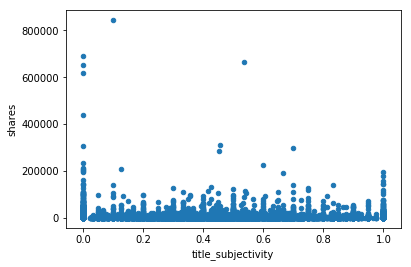

In [185]:
plt.figure()

df.plot(kind='scatter', x='title_subjectivity', y='shares')

                                                                                                  
                         
  


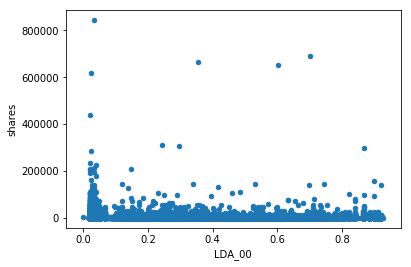

In [186]:
df.plot(kind='scatter', x='LDA_00', y='shares')

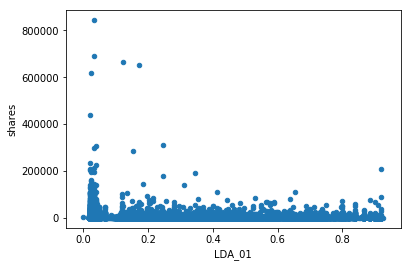

In [187]:
df.plot(kind='scatter', x='LDA_01', y='shares')

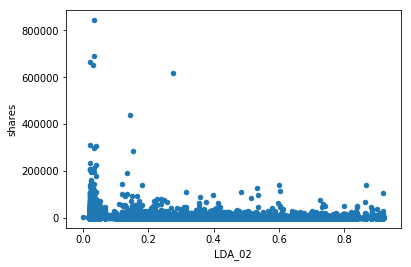

In [188]:
df.plot(kind='scatter', x='LDA_02', y='shares')

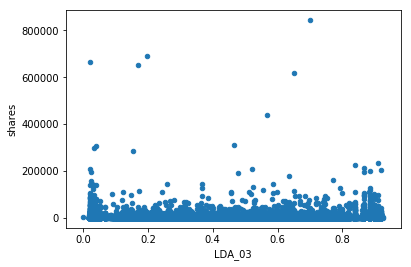

In [189]:
df.plot(kind='scatter', x='LDA_03', y='shares')

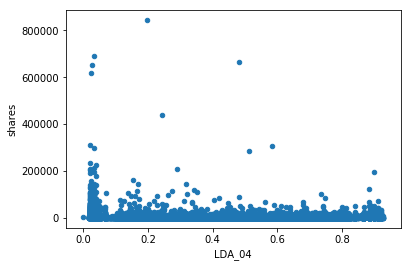

In [190]:
df.plot(kind='scatter', x='LDA_04', y='shares')

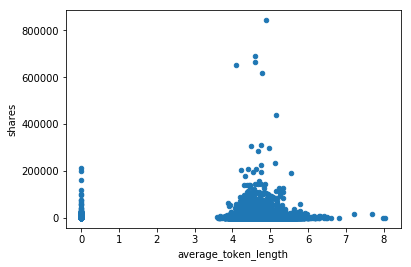

In [191]:
df.plot(kind='scatter', x='average_token_length', y='shares')

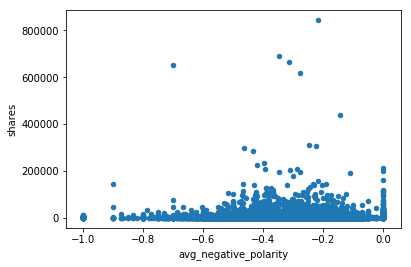

In [192]:
df.plot(kind='scatter', x='avg_negative_polarity', y='shares')

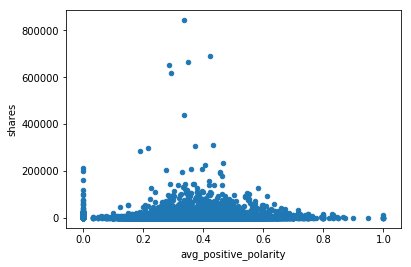

In [193]:
df.plot(kind='scatter', x='avg_positive_polarity', y='shares')

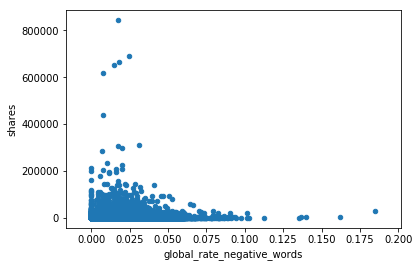

In [194]:
df.plot(kind='scatter', x='global_rate_negative_words', y='shares')

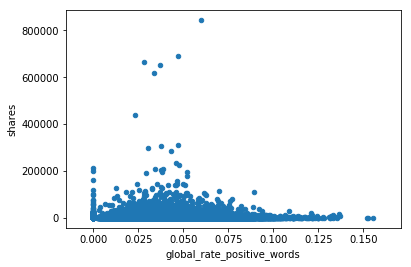

In [195]:
df.plot(kind='scatter', x='global_rate_positive_words', y='shares')

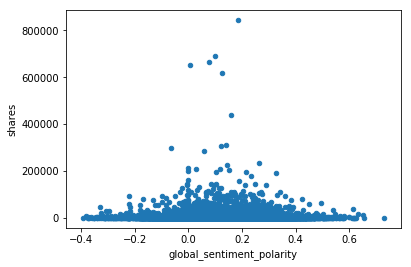

In [196]:
df.plot(kind='scatter', x='global_sentiment_polarity', y='shares')

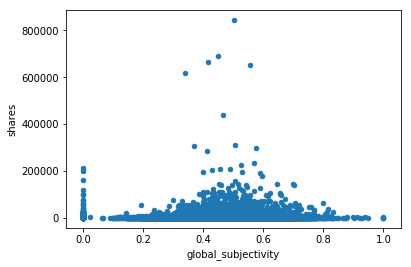

In [197]:
df.plot(kind='scatter', x='global_subjectivity', y='shares')

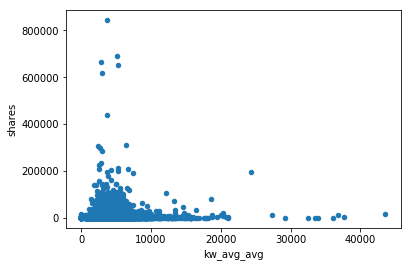

In [198]:
df.plot(kind='scatter', x='kw_avg_avg', y='shares')

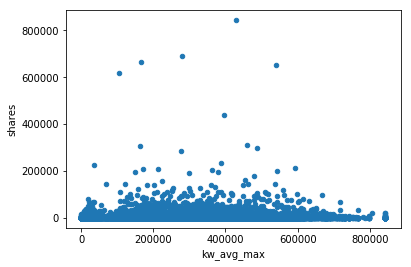

In [199]:
df.plot(kind='scatter', x='kw_avg_max', y='shares')

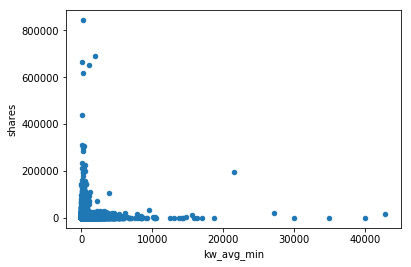

In [200]:
df.plot(kind='scatter', x='kw_avg_min', y='shares')

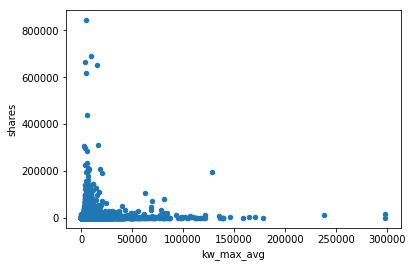

In [201]:
df.plot(kind='scatter', x='kw_max_avg', y='shares')

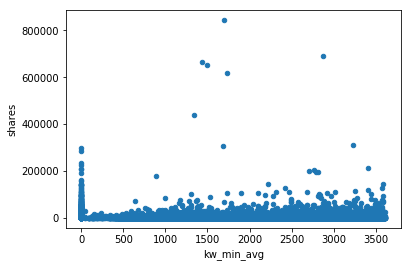

In [202]:
df.plot(kind='scatter', x='kw_min_avg', y='shares')

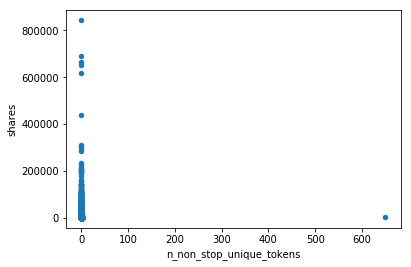

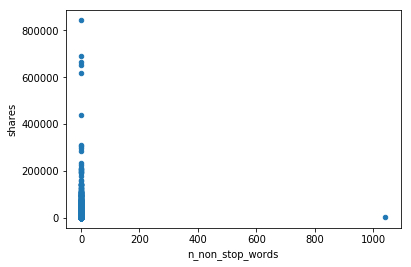

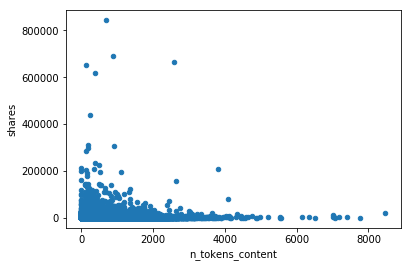

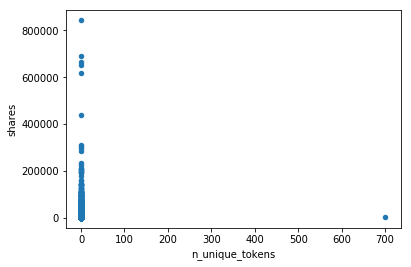

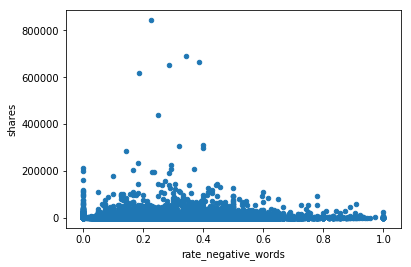

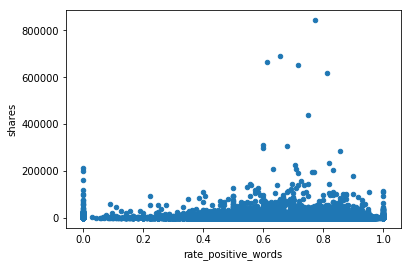

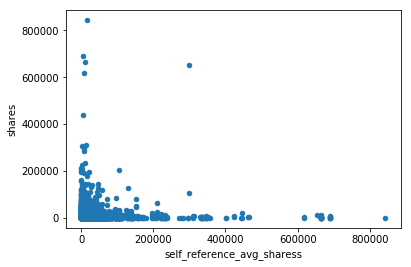

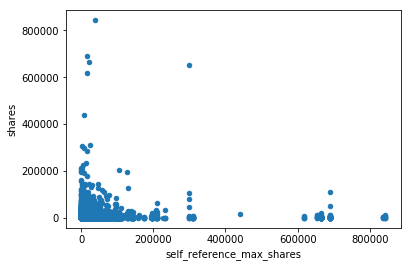

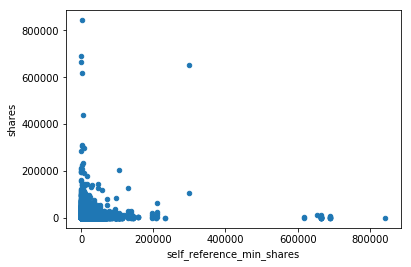

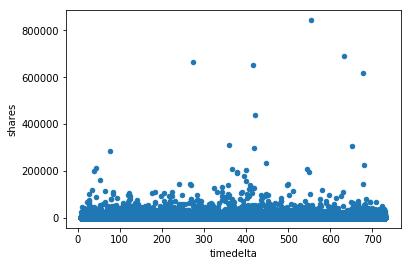

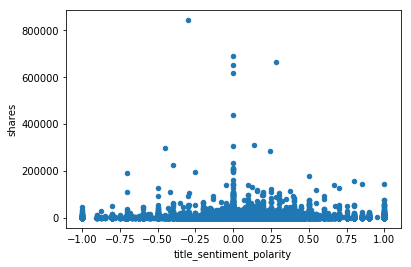

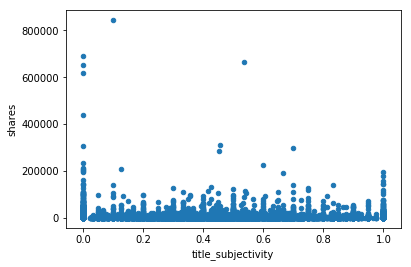

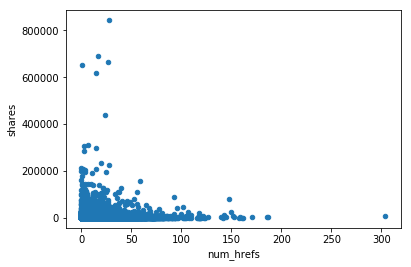

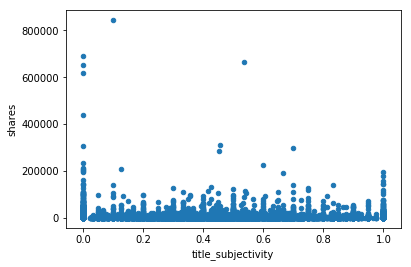

In [203]:
df.plot(kind='scatter', x='n_non_stop_unique_tokens', y='shares')
df.plot(kind='scatter', x='n_non_stop_words', y='shares')
df.plot(kind='scatter', x='n_tokens_content', y='shares')
df.plot(kind='scatter', x='n_unique_tokens', y='shares')
df.plot(kind='scatter', x='rate_negative_words', y='shares')
df.plot(kind='scatter', x='rate_positive_words', y='shares')
df.plot(kind='scatter', x='self_reference_avg_sharess', y='shares')
df.plot(kind='scatter', x='self_reference_max_shares', y='shares')
df.plot(kind='scatter', x='self_reference_min_shares', y='shares')
df.plot(kind='scatter', x='timedelta', y='shares')
df.plot(kind='scatter', x='title_sentiment_polarity', y='shares')
df.plot(kind='scatter', x='title_subjectivity', y='shares')
df.plot(kind='scatter', x='num_hrefs', y='shares')
df.plot(kind='scatter', x='title_subjectivity', y='shares')

In [240]:
#Train a model with all the features
lm_df= sm.ols(formula="shares ~  LDA_00 + LDA_01 + LDA_02 + LDA_03 + LDA_04 + abs_title_sentiment_polarity + abs_title_subjectivity + average_token_length + avg_negative_polarity + avg_positive_polarity + global_rate_negative_words +  global_rate_positive_words + global_sentiment_polarity + global_subjectivity + kw_avg_avg + kw_avg_max + kw_avg_min + kw_max_avg + kw_max_min + kw_min_avg + kw_min_max + n_non_stop_unique_tokens + n_non_stop_words + n_tokens_content + n_unique_tokens + num_hrefs + rate_negative_words + rate_positive_words + self_reference_avg_sharess + self_reference_max_shares + self_reference_min_shares + timedelta + title_sentiment_polarity + title_subjectivity", data=df_train).fit()
print(lm_df.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     16.69
Date:                Wed, 25 Apr 2018   Prob (F-statistic):           3.77e-94
Time:                        14:01:31   Log-Likelihood:            -2.9917e+05
No. Observations:               27751   AIC:                         5.984e+05
Df Residuals:                   27717   BIC:                         5.987e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [241]:
lm_df.predict(df_train).head(10)

31150    4675.479833
34014    2985.116608
6360     2124.815027
33015    3777.828442
14597    1874.596004
24049    2064.164920
12234    2796.341632
37035    1732.854644
32521    3382.345950
5008     2506.554357
dtype: float64

In [242]:
predict_df_train = pd.DataFrame({'Actual_Shares': df_train.shares, 'Predicted_Shares': lm_df.predict(df_train)})
predict_df_train.head(10)


,Actual_Shares,Predicted_Shares
31150,2400,4675.479833
34014,1700,2985.116608
6360,1300,2124.815027
33015,1100,3777.828442
14597,640,1874.596004
24049,1300,2064.164920
12234,2200,2796.341632
37035,691,1732.854644
32521,4700,3382.345950
5008,5400,2506.554357


In [250]:
predict_df_train.describe()

,Actual_Shares,Predicted_Shares
count,27751.000000,27751.000000
mean,3351.711218,3351.711218
std,11747.344133,1639.747187
min,1.000000,-1263.015601
25%,945.000000,2263.968931
50%,1400.000000,3058.254731
75%,2800.000000,4135.655413
max,843300.000000,32365.014032


In [243]:
#Pair the actual and the predicted values
print("Actual - Predicted:\n", (df_train.shares - lm_df.predict(df_train)))
print("\n(Actual - Predicted) squared:\n", (df_train.shares - lm_df.predict(df_train))**2)

Actual - Predicted:
 31150     -2275.479833
34014     -1285.116608
6360       -824.815027
33015     -2677.828442
14597     -1234.596004
24049      -764.164920
12234      -596.341632
37035     -1041.854644
32521      1317.654050
5008       2893.445643
19302     -1409.892281
10114     -1404.316450
31505      9116.892575
4487       -920.638377
82          458.233031
15930     -1603.331766
31188      -686.957750
20732     -1148.495002
34226     -2517.390593
31529      -477.925327
24696       867.801753
29581      8628.116739
112         447.051697
28758     -1687.033292
11198       583.424279
13326     -3622.537227
29492     -2038.300652
30568      -561.615024
10999     -2329.456052
8084      27317.495341
33164     53313.121595
22699     -1039.375234
27834     -5019.993777
14103      -752.361754
9211         44.811384
38895     -1307.990477
1689      -2669.778462
19267     -2494.330236
20703      8096.627059
38276     -4445.659639
10375     -5312.494964
9986      -3908.914767
36211      -5

 31150    5.177808e+06
34014    1.651525e+06
6360     6.803198e+05
33015    7.170765e+06
14597    1.524227e+06
24049    5.839480e+05
12234    3.556233e+05
37035    1.085461e+06
32521    1.736212e+06
5008     8.372028e+06
19302    1.987796e+06
10114    1.972105e+06
31505    8.311773e+07
4487     8.475750e+05
82       2.099775e+05
15930    2.570673e+06
31188    4.719110e+05
20732    1.319041e+06
34226    6.337255e+06
31529    2.284126e+05
24696    7.530799e+05
29581    7.444440e+07
112      1.998552e+05
28758    2.846081e+06
11198    3.403839e+05
13326    1.312278e+07
29492    4.154670e+06
30568    3.154114e+05
10999    5.426365e+06
8084     7.462456e+08
33164    2.842289e+09
22699    1.080301e+06
27834    2.520034e+07
14103    5.660482e+05
9211     2.008060e+03
38895    1.710839e+06
1689     7.127717e+06
19267    6.221683e+06
20703    6.555537e+07
38276    1.976389e+07
10375    2.822260e+07
9986     1.527961e+07
36211    3.023180e+05
23081    4.933933e+07
19577    1.712659e+07
24063    

In [244]:
# Print the Mean Squared Error of the model on the training set
mse = ((df_train.shares - lm_df.predict(df_train))** 2).mean()
print("\nMean Squared Error:\n", mse)


Mean Squared Error:
 135306447.43498


In [245]:
# Print the Mean Absolute Error of the model on the training set
mae = abs(df_train.shares - lm_df.predict(df_train)).mean()
print("\nMean Absolute Error:\n", mae)


Mean Absolute Error:
 2999.019782513406


In [270]:
 #turn into classification problem and test accuracy score
# for now, just using a 3395 shares threshold for classification as popular (above the mean value).  
# or could only could extremely high share values as being 'viral' (val 1) and the rest being 
# 'not viral' (val 0)
predictions=lm_df.predict(df_train)

predictions.count()

27751

In [267]:
predictions = predictions.apply(lambda res: 1 if res > 3350 else 0)
# calculate predictions for 'shares' on a sample of the set
predictions.value_counts()

0    16154
1    11597
dtype: int64

In [268]:
# get mean squared error
mse = mean_squared_error(df_train['shares'], predictions)
mse
# something has gone wrong here, obviously. mse is gigantic

149225021.10947353

In [269]:

# root mean squared error for comparison
sqrt(mse)

12215.769362159452

In [274]:
predictions.head(10)

31150    4675.479833
34014    2985.116608
6360     2124.815027
33015    3777.828442
14597    1874.596004
24049    2064.164920
12234    2796.341632
37035    1732.854644
32521    3382.345950
5008     2506.554357
dtype: float64

In [280]:
df_train['shares_binary'] = np.where(df_train['shares'] >=3395, 1, 0)
df_train['shares_binary'].head(2)

C:\Users\anjal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


31150    0
34014    0
Name: shares_binary, dtype: int32

In [281]:
predictions = predictions.apply(lambda res: 1 if res > 3395 else 0)

In [282]:
predictions.head(2)

31150    0
34014    0
dtype: int64

In [283]:
# Prepare the descriptive features
X1 = predictions
y1 = df_train.shares_binary
print("Descriptive features:\n", X1.head(4))
print("\nTarget feature:\n", y1.head(4))

Descriptive features:
 31150    0
34014    0
6360     0
33015    0
dtype: int64

Target feature:
 31150    0
34014    0
6360     0
33015    0
Name: shares_binary, dtype: int32


In [284]:
# Some more evaluation metrics for 30% test data
print("Accuracy: ", metrics.accuracy_score(y1, X1))
print("Confusion matrix: \n", metrics.confusion_matrix(y1, X1))
print("Classification report:\n ", metrics.classification_report(y1, X1))


Accuracy:  0.7966920110986991
Confusion matrix: 
 [[22109     0]
 [ 5642     0]]
Classification report:
               precision    recall  f1-score   support

          0       0.80      1.00      0.89     22109
          1       0.00      0.00      0.00      5642

avg / total       0.63      0.80      0.71     27751



C:\Users\anjal\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
